# Tarea_12 
## Francisco Ricardo Torres Arvizu

In [1]:
Pkg.update()

INFO: Updating METADATA...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [2]:

Pkg.add("PyPlot")

INFO: Package PyPlot is already installed


## Ejercicio 1 
Implementar método implicito de Euler como quieran.

## Solución 
Se crea una funcion que nos proporcione el método de Euler y use el método de Newton para despejar la $y_{n+1}$ del método de Euler implicito. Utilizamos una función del método de Newtón de la tarea  4 que requiere SymPy.


In [3]:
using SymPy

In [4]:
using PyPlot

In [5]:
A,xi,x1,m=symbols("A,xi,x1,m")

(A, xi, x1, m)

  likely near /opt/julia_packages/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.6/IJulia/src/kernel.jl:31
  likely near /opt/julia_packages/.julia/v0.6/IJulia/src/kernel.jl:31
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


In [6]:
function dif(f::Function)

 
    df= diff(f(x1),x1)

return df
end 

In [7]:
function newton1(f::Function,w0) #se crea una funcion que tome los parametros que reuiera la ecuacion par solucionarse  
    w1=w0
    d=dif(f)
    df=lambdify( d,[x1]);
    w2=0.0
    tolerancia=0.000000000001
    error=0.001
    raices=[]
    while error >  tolerancia
        w2=w1-(f(w1)/df(w1))
        error=abs(w2-w1)
        w1=w2
       
    end 
    return w1
end

newton1 (generic function with 1 method)

In [8]:
using PyPlot

function eulerFunctionimplicita(f::Function,time0,timef,y0,delta)
    #Se declaran dos arreglos a los cuales iremos agregando los valores calculados de t y y
    y=[]
    t=[]
    
    push!(t,time0)
    push!(y,y0)
  
    while(t[length(t)]<timef)
        
        push!(t,t[length(t)]+delta)
        g(x1)=x1-y[length(y)]-delta*f(t[length(t)],x1)
        y1=newton1(lambdify(g(x1),[x1]),t[length(t)])
        push!(y,y1)
        
    end
    title("Solución")
   scatter(t, y, color = "blue",s = 10, marker = "*")
    grid()
   ylabel("y")
    xlabel("x")
end

eulerFunctionimplicita (generic function with 1 method)

127.

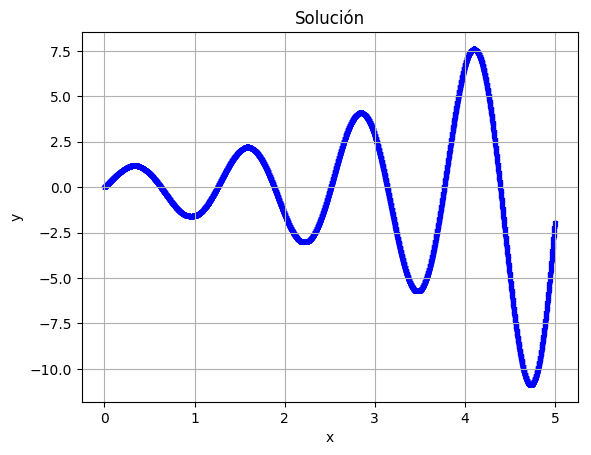

505532 seconds (10.13 M allocations: 491.923 MiB, 0.35% gc time)


In [9]:
@time eulerFunctionimplicita((t,y)->y-(1/2)*(sin(5*t)*e^((1/2)*t))+5*cos(5*t)*(e^((1/2)*t)),0.0,5.0,0.0,0.001)

## Ejercicio 2
Implementar Euler: Regla del punto medio.

## Solución
Se crea una función que nos permite implementar el método del punto medio, y no entregue la gráfica de la función solución.

In [10]:

function eulerFunction2(f::Function,time0,timef,y0,delta)
    #Se declaran dos arreglos a los cuales iremos agregando los valores calculados de t y y
    y=[]
    t=[]
    t12=[]
    push!(t,time0)
    push!(y,y0)
    y12(t,y)=y+0.5*delta*f(t,y)
   push!(t12,time0)
    while(t[length(t)]<timef)
        
         push!(t12,t[length(t)]+0.5*delta)
        push!(t,t[length(t)]+delta)
        
        push!(y,y[length(y)]+delta*f(t12[length(t12)],y12(t[length(t)-1],y[length(y)])))
        
    end
    title("Solución")
  
    scatter(t, y, color = "blue", s = 10, marker = "*")
    grid()
    
   ylabel("y")
    
    xlabel("x") 

end

eulerFunction2 (generic function with 1 method)

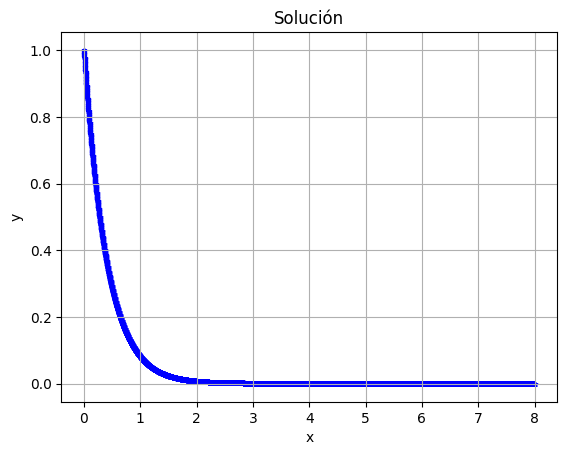

PyObject <matplotlib.text.Text object at 0x7f4a218e4fd0>

In [11]:
eulerFunction2((t,x)->-2.5x,0.0,8,1.0,0.001)

## Ejercicio 3
Implementar método de Runge-Kutta de orden 4.

$$ x_{n+1}=x_n+\frac{h}{6}\left( k_1+2 k_2+2 k_3 +k_4 \right),$$
 $$\begin{align} k_1&=f(t_n,x_n),\ k2&=f(t{n+1/2},x_n+\frac{h}{2}k_1),\ k3&=f(t{n+1/2},x_n+\frac{h}{2}k_2),\ k_4&=f(t_n,x_n+h k_3).\ \end{align}$$

## Solución
Utilizando la denición del método de Runge Kutta creamos la siguiente función que no permite implementarlo.


In [12]:
function rungeKuttaFunction(f::Function,t0,tf,y0,delta)
    y = []
    t=[]
    push!(y,y0)
    push!(t,t0)
    k1(t,y) = f(t,y)
    k2(t,y) = f(t+(delta/2),y+((delta/2)*k1(t,y)))
    k3(t,y) = f(t+(delta/2),y+((delta/2)*k2(t,y)))
    k4(t,y) = f(t+(delta),y+(delta)*k3(t,y))
    h1(t,y)=k1(t,y)+2*k2(t,y)+2*k3(t,y)+k4(t,y)
    while (t[length(t)]<tf)
        push!(t,t[length(t)]+delta)
        push!(y,y[length(y)]+(delta/6)*h1(t[length(t)-1],y[length(y)]))
    end
    figure()
    xlim(t0,tf)
    scatter(t,y, color="red",s = 10, marker = "*")
    legend()
    title("Gráfica de la solución con el método de Runge-Kutta")
    ylabel("y")
    grid()
end

rungeKuttaFunction (generic function with 1 method)

Se prueba la Función 

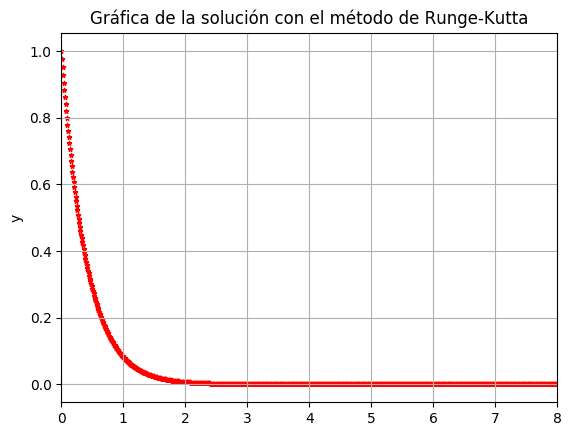

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [13]:
rungeKuttaFunction((t,x)->-2.5x,0.0,8,1.0,0.01)

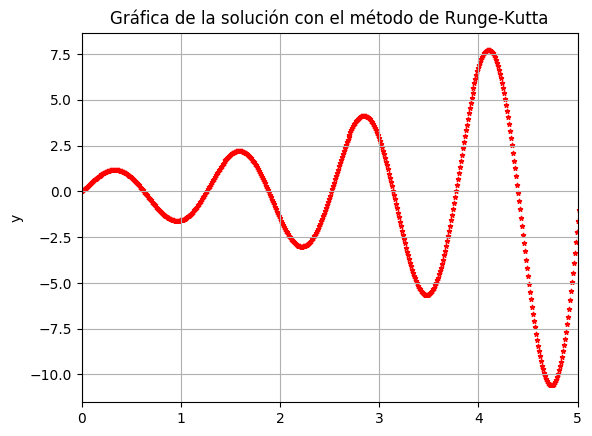

In [14]:
rungeKuttaFunction((t,y)->y-(1/2)*(sin(5*t)*e^((1/2)*t))+5*cos(5*t)*(e^((1/2)*t)),0.0,5.0,0.0,0.01)

## Ejercicio 4
Repita el ejercicio 1 del notebook anterior (Julia_6) y discuta los resultados respecto a lo que obtuvo con el método implícito.

## Solución
Se basa en la función del ejercicio 2 para crear una funci{on que nos compare el metodo de Euler implicito con la solucion exacta 

In [15]:

function eulercompFunctionimplicita(f::Function,f2::Function,time0,timef,y0,delta)
    #Se declaran dos arreglos a los cuales iremos agregando los valores calculados de t y y
    y=[]
    t=[]
    solucion=[]
    push!(t,time0)
    push!(y,y0)
   push!(solucion, f2(time0))
    while(t[length(t)]<timef)
        push!(t,t[length(t)]+delta)
        g(x1)=x1-y[length(y)]-delta*f(t[length(t)],x1)
        y1=newton1(lambdify(g(x1),[x1]),t[length(t)])
        push!(y,y1)
         push!(solucion, f2(t[length(t)]))
    end
    title("Solución con el Método de Euler vs solución exacta vs ")
     plot(t,solucion, color="red", label="Solución exacta")
    legend()
    scatter(t, y, color = "blue",label="Solución método de Euler", s = 10, marker = "*")
    legend()
    grid()
    
   ylabel("y")
    
    xlabel("x") 

end

eulercompFunctionimplicita (generic function with 1 method)

Probamos la función

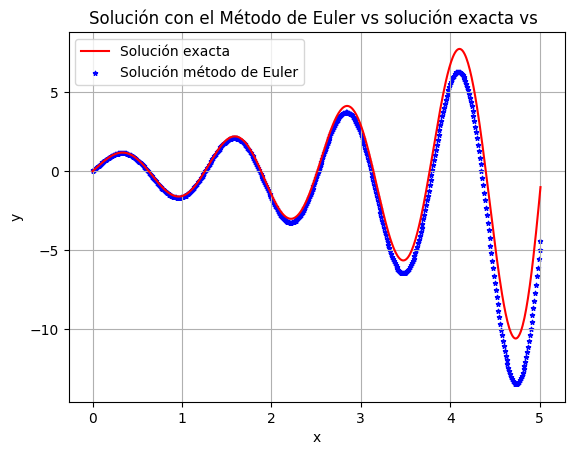

PyObject <matplotlib.text.Text object at 0x7f4a24056ad0>

In [16]:
eulercompFunctionimplicita((t,y)->y-(1/2)*(sin(5*t)*e^((1/2)*t))+5*cos(5*t)*(e^((1/2)*t)),(s)->(e^(s/2))*sin(5*s),0.0,5.0,0.0,0.01)

Se repite lo mismo que el ejericio 1 del notebook anterior, (tarea 11)

Se compara con la solución excata dada la condicion incial  $x(0)=1$ la cual es $x(t)=e^{-2.5t}$

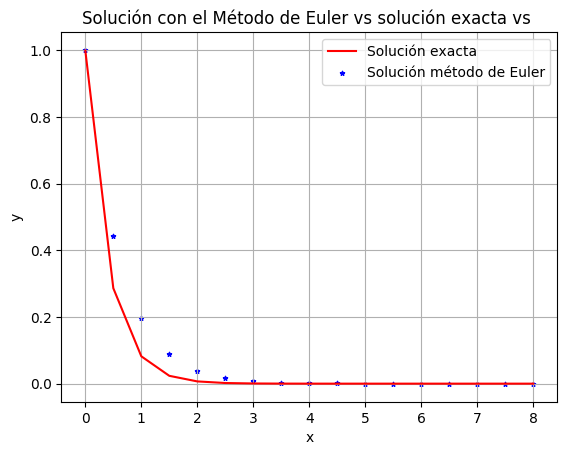

PyObject <matplotlib.text.Text object at 0x7f4a21685cd0>

In [17]:
eulercompFunctionimplicita((t,x)->-2.5x,t->e^(-2.5*t),0.0,8,1.0,0.5)

Con $\alpha=2.5$  $h=0.2$  $x(0)=1$

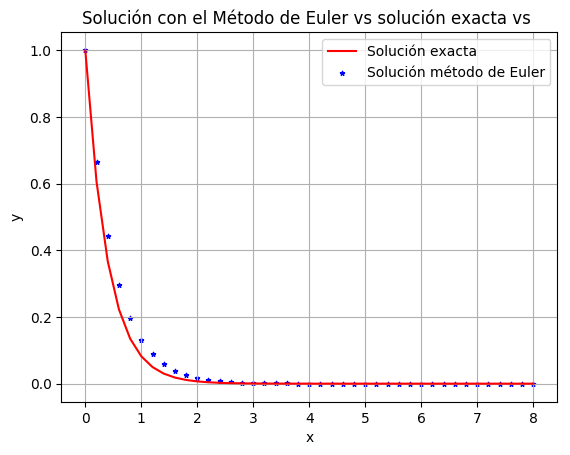

PyObject <matplotlib.text.Text object at 0x7f4a21821650>

In [18]:
eulercompFunctionimplicita((t,x)->-2.5x,t->e^(-2.5*t),0.0,8,1.0,0.2)

Con $\alpha=2.5$  $h=0.01$  $x(0)=1$

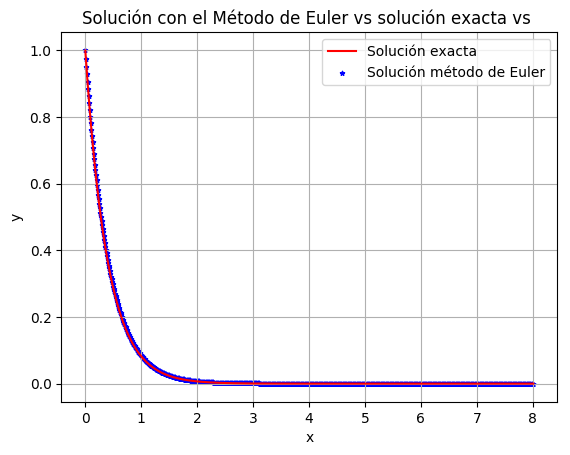

PyObject <matplotlib.text.Text object at 0x7f4a21419f50>

In [19]:
eulercompFunctionimplicita((t,x)->-2.5x,t->e^(-2.5*t),0.0,8,1.0,0.01)

Se compara con la solución excata dada la condicion incial  $x(0)=2$ la cual es $x(t)=2e^{-2.5t}$

Con $\alpha=2.5$  $h=0.5$  $x(0)=2$

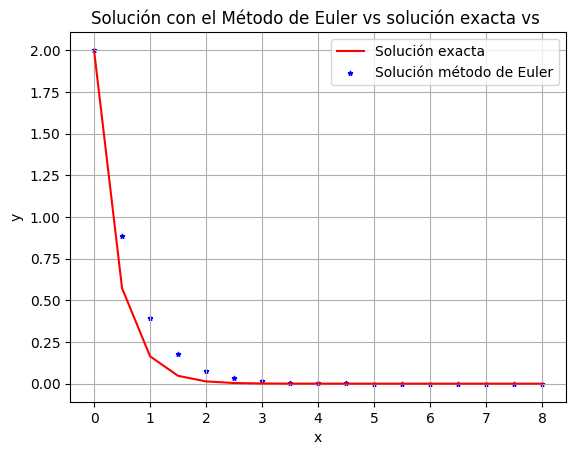

PyObject <matplotlib.text.Text object at 0x7f4a215ac5d0>

In [20]:
eulercompFunctionimplicita((t,x)->-2.5x,t->2e^(-2.5*t),0.0,8,2.0,0.5)

Con $\alpha=2.5$  $h=0.2$  $x(0)=2$

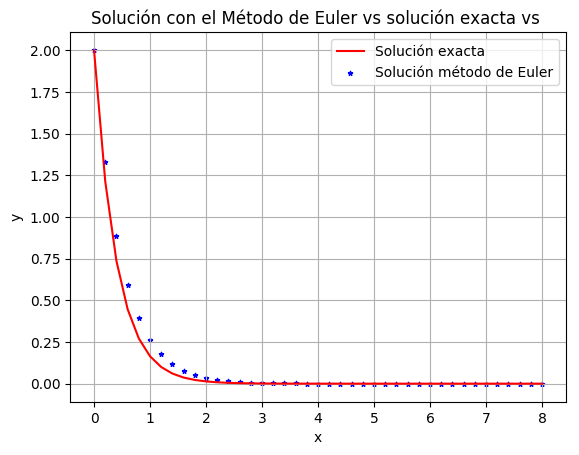

PyObject <matplotlib.text.Text object at 0x7f4a21106350>

In [21]:
eulercompFunctionimplicita((t,x)->-2.5x,t->2e^(-2.5*t),0.0,8,2.0,0.2)

Con $\alpha=2.5$  $h=0.01$  $x(0)=2$

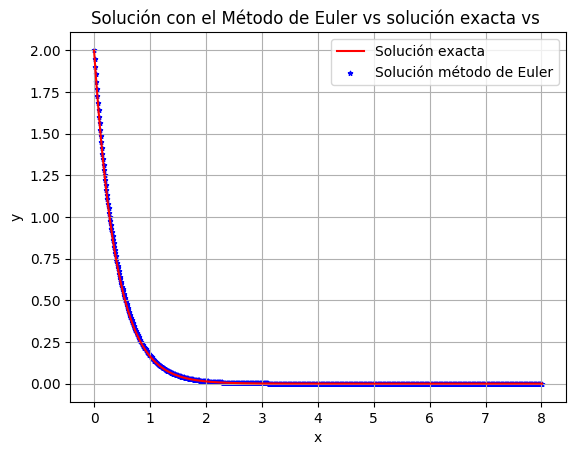

PyObject <matplotlib.text.Text object at 0x7f4a215fb350>

In [22]:
eulercompFunctionimplicita((t,x)->-2.5x,t->2e^(-2.5*t),0.0,8,2.0,0.01)

## Discusión
 A diferencia del método de Euler explicito, el método de Euler implicito tiende a aproximar mejor la solución con tamaños de paso mayores, aunque el método explicito es mas rápido con tamaños de paso más pequeños, ya que en el iplicito se usa el Método de Newtón con cada iteración, debido a la naturaleza del algoritmo.

## Ejercicio 5
Usar el método del punto medio y de Runge-Kutta para resolver la ecuación: $$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$ Compare su respuesta con la solución exacta: $4+8t-5t^2$. notén que $x(0)=4$.

## Solución
Pimeramente se uilizan las funciones credas en los ejercicios 2 y 3, para obtener una solución aproximada. 

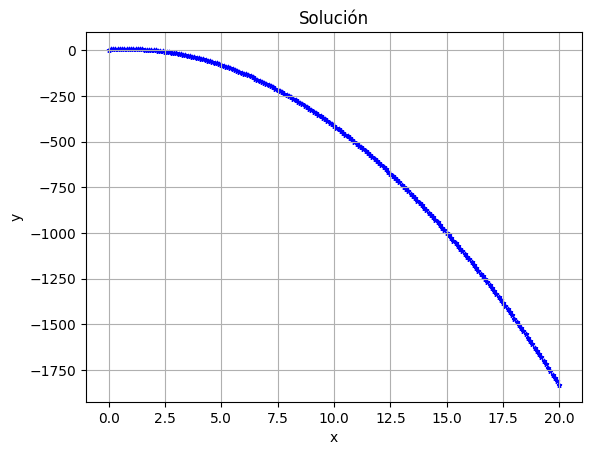

PyObject <matplotlib.text.Text object at 0x7f4a20fee0d0>

In [23]:
eulerFunction2((t,x)->(2*x-18t)/(1+t),0.0,20,4.0,0.1)

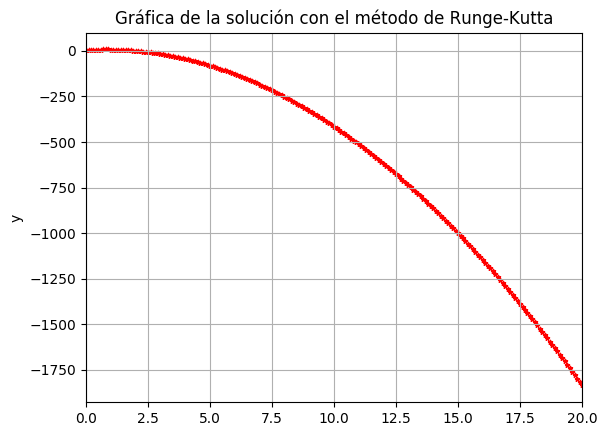

In [24]:
rungeKuttaFunction((t,x)->(2*x-18t)/(1+t),0.0,20,4.0,0.1)

Se crean funciones  las funciones que nos comparen ambas métodos con la solución exacta. 


In [25]:
function eulercompFunction2(f::Function,f2::Function,time0,timef,y0,delta)
    #Se declaran dos arreglos a los cuales iremos agregando los valores calculados de t y y
    y=[]
    t=[]
    solucion=[]
    t12=[]
    push!(t,time0)
    push!(y,y0)
    y12(t,y)=y+0.5*delta*f(t,y)
   push!(t12,time0)
    push!(solucion, f2(time0))
    while(t[length(t)]<timef)
          push!(t12,t[length(t)]+0.5*delta)
        push!(t,t[length(t)]+delta)
        push!(solucion, f2(t[length(t)]))
        push!(y,y[length(y)]+delta*f(t12[length(t12)],y12(t[length(t)-1],y[length(y)])))
    end
     title("Solución con el Método de Euler vs solución exacta  ")
     plot(t,solucion, color="red", label="Solución exacta")
    legend()
    scatter(t, y, color = "blue",label="Solución método del punto medio", s = 10, marker = "*")
    legend()
    grid()
    
   ylabel("y")
    
    xlabel("x") 

end

eulercompFunction2 (generic function with 1 method)

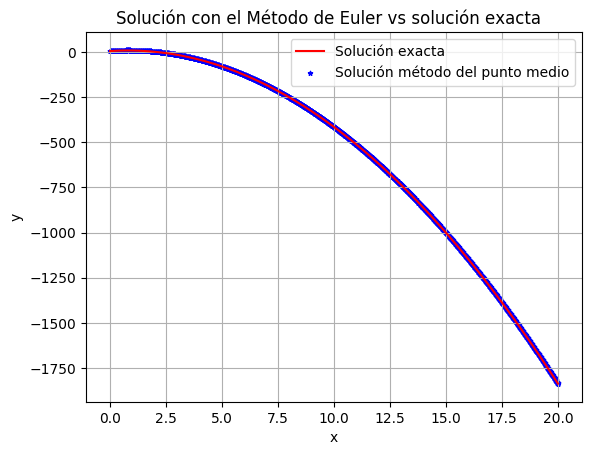

PyObject <matplotlib.text.Text object at 0x7f4a20ddf650>

In [26]:
eulercompFunction2((t,x)->(2*x-18*t)/(1+t),t->4+8t-5t^2,0.0,20,4.0,0.01) 

In [27]:
function rungeKuttacompFunction(f::Function,f2::Function,t0,tf,y0,delta)
    y = []
    t=[]
    solucion=[]
    push!(y,y0)
    push!(t,t0)
    push!(solucion, f2(t0))
    k1(t,y) = f(t,y)
    k2(t,y) = f(t+(delta/2),y+((delta/2)*k1(t,y)))
    k3(t,y) = f(t+(delta/2),y+((delta/2)*k2(t,y)))
    k4(t,y) = f(t+(delta),y+(delta)*k3(t,y))
    h1(t,y)=k1(t,y)+2*k2(t,y)+2*k3(t,y)+k4(t,y)
    while (t[length(t)]<tf)
        push!(t,t[length(t)]+delta)
         push!(solucion, f2(t[length(t)]))
        push!(y,y[length(y)]+(delta/6)*h1(t[length(t)-1],y[length(y)]))
    end
     title("Solución con el Método de Euler vs solución exacta vs ")
     plot(t,solucion, color="red", label="Solución exacta")
    legend()
    scatter(t, y, color = "blue",label="Solución método de Runge-Kutta",s = 10, marker = "*")
    legend()
    grid()
    ylabel("y")
    xlabel("x") 
end

rungeKuttacompFunction (generic function with 1 method)

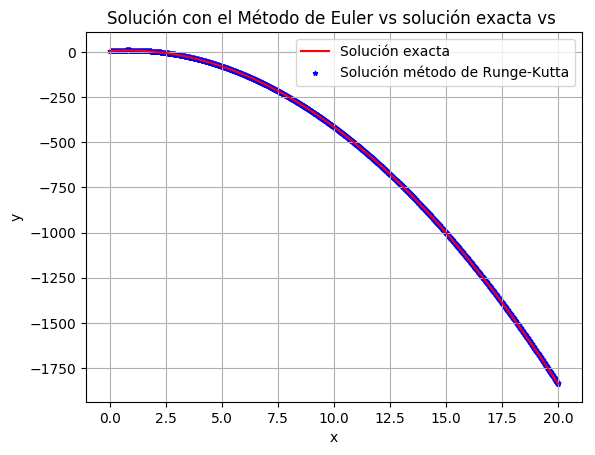

PyObject <matplotlib.text.Text object at 0x7f4a20cbec10>

In [28]:
rungeKuttacompFunction((t,x)->(2*x-18*t)/(1+t),t->4+8t-5t^2,0.0,20,4.0,0.01) 

#### Nota
Deberán hacer una implementación de Runge-Kutta para dos dimensiones (o de una vez más si quieren, basandose en el ejemplo que les di, si se les ocurre una mánera mejor, adelante).

#### Nota
Usen $h=0.1$ para hacer la comparación o cualquier otro que refleje una diferencia significativa entre los dos métodos en la energía, el chiste es no usar un $h$ muy pequeño.

## Ejercicio 6
Grafique la energía total del oscilador harmonico usando los métodos explícito de Euler y Runge-Kutta de orden 4. Compare sus respuestas y discuta.

## Solución
Se implementa la una funcion que implemnte el metodo de Runge Kutta de orden 4 para ecuaciones diferenciales de segundo orden.

In [29]:
function RungeKuttaOrden2(g::Function, g1::Function, delta, t0,tf,y10,y20)
    t = []
    y1 = []
    y2 = [] 
    k11(t,u1,u2) = g(t,u1,u2)*delta
    k21(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k31(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k41(t,u1,u2) = g(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    k12(t,u1,u2)= g1(t,u1,u2)*delta
    k22(t,u1,u2)= g1(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k32(t,u1,u2) = g1(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k42(t,u1,u2) = g1(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    f1(t,u1,u2) = u1+1/6*(k11(t,u1,u2)+2*k21(t,u1,u2)+2*k31(t,u1,u2)+k41(t,u1,u2))
    f2(t,u1,u2) = u2+1/6*(k12(t,u1,u2)+2*k22(t,u1,u2)+2*k32(t,u1,u2)+k42(t,u1,u2))
    push!(t,t0)
    push!(y1,y10)
    push!(y2,y20)
    while(t[length(t)]<tf)
        push!(t, t[length(t)]+delta)
        push!(y1,f1(t[length(t)-1],y1[length(y1)],y2[length(y2)]))
        push!(y2,f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)]))    
    end
    figure()
    subplot(2,1,1)
    plot(t, y2, color = "blue")
    legend()
    title("Gráfica de la función")
    ylabel(L"f(x)")
    xlabel(L"t")
    grid()
    subplot(2,1,2)
    plot(t,y1, color="red")
    legend()
    ylabel(L"\frac{df(x)}{dt}")
    xlabel(L"t")
    title("Gráfica de la derivada de la función")
    grid() 
end
    

RungeKuttaOrden2 (generic function with 1 method)

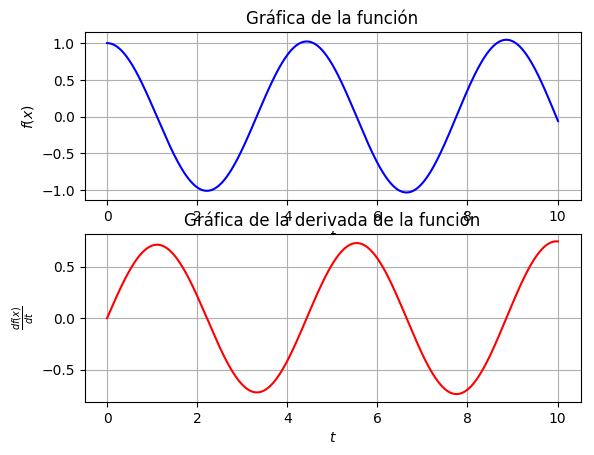

In [30]:
RungeKuttaOrden2((t,y1,y2)->y2,(t,y1,y2)->-2*y1,0.01,0.0,10.0,0.0,1.0)

In [31]:
function euler2orden(f::Function,f2::Function,time0,timef,y10,y20,delta)
    y2=[]
    y1=[]
    t=[]
    push!(t,time0)
    push!(y1,y10)
     push!(y2,y20)
    while(t[length(t)]<timef)
        push!(t,t[length(t)]+delta)
        push!(y1,y1[length(y1)]+f(t[length(t)-1],y1[length(y1)],y2[length(y2)])*delta)
        push!(y2,y2[length(y2)]+f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)])*delta)
    end
    figure()
    subplot(2,1,1)
    plot(t, y2, color = "blue")
    legend()
    title("Gráfica de la función")
    ylabel(L"f(x)")
    xlabel(L"t")
    grid()
    subplot(2,1,2)
    plot(t,y1, color="red")
    legend()
    ylabel(L"\frac{df(x)}{dt}")
    xlabel(L"t")
    title("Gráfica de la derivada de la función")
    grid()
end

euler2orden (generic function with 1 method)

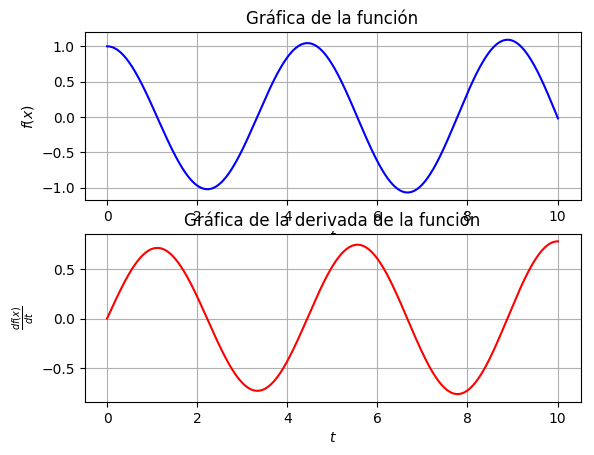

In [32]:
euler2orden((t,y1,y2)->y2,(t,y1,y2)->-2*y1,0.0,10.0,0.0,1.0,0.01)

In [33]:
v=[1,2,3]
}

LoadError: [91msyntax: unexpected "}"[39m

In [34]:
m=3

3

In [35]:
m*v

3-element Array{Int64,1}:
 3
 6
 9

In [36]:
function us(y,m1)
    us=[]
    for i in 1:length(y)
      push!(us,0.5*m1*y[i]^2)
    end
    return us
end

us (generic function with 1 method)

In [37]:
function energiaoscilador(f::Function,f2::Function,time0,timef,y10,y20,delta,m,k)
y2=[]
    y1=[]
    t=[]
    ke=[]
    u=[]
    et=[]
    push!(t,time0)
    push!(y1,y10)
     push!(y2,y20)
    push!(u,0.5*k*(y20)^2)
    push!(ke, 0.0)
    push!(et, ke[length(ke)]+u[length(u)])
    while(t[length(t)]<timef)
        push!(t,t[length(t)]+delta)
        push!(y1,y1[length(y1)]+f(t[length(t)-1],y1[length(y1)],y2[length(y2)])*delta)
        push!(y2,y2[length(y2)]+f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)])*delta)
        push!(u,0.5*k*(y2[length(y2)])^2)
        push!(ke, 0.5*m*(y1[length(y1)])^2)
        push!(et, ke[length(ke)]+u[length(u)])
    end
    
    figure()
    subplot(2,1,1)
    plot(t, ke, color = "blue")
    plot(t,u, color="red")
    legend()
    title("Energía cinética y potencial")
    ylabel("Energía")
    xlabel("Tiempo")
    grid()
    subplot(2,1,2)
    plot(t,et, color="green")
    legend()
    ylabel("Energía")
    xlabel("Tiempo")
    title("Gráfica de la energía total")
    grid()
    
    
end

energiaoscilador (generic function with 1 method)

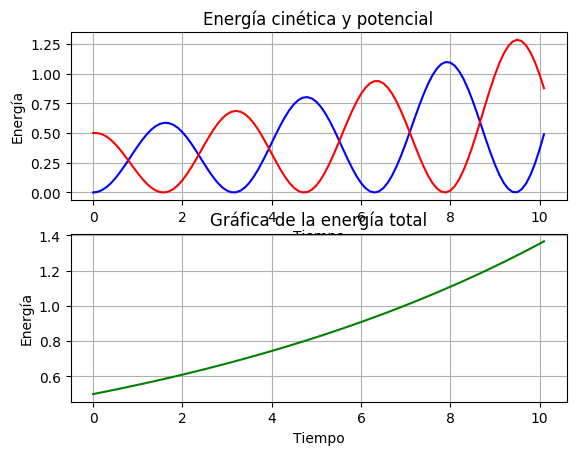

In [38]:
energiaoscilador((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,1.0,0.1,1,1)

In [39]:
function energiaoscilador2(g::Function,g1::Function,t0,tf,y10,y20,delta,m,k)
    t = []
    y1 = []
    y2 = [] 
    ke=[]
    u=[]
    et=[]
    k11(t,u1,u2) = g(t,u1,u2)*delta
    k21(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k31(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k41(t,u1,u2) = g(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    k12(t,u1,u2)= g1(t,u1,u2)*delta
    k22(t,u1,u2)= g1(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k32(t,u1,u2) = g1(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k42(t,u1,u2) = g1(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    f1(t,u1,u2) = u1+1/6*(k11(t,u1,u2)+2*k21(t,u1,u2)+2*k31(t,u1,u2)+k41(t,u1,u2))
    f2(t,u1,u2) = u2+1/6*(k12(t,u1,u2)+2*k22(t,u1,u2)+2*k32(t,u1,u2)+k42(t,u1,u2))
    push!(t,t0)
    push!(y1,y10)
    push!(y2,y20)
    push!(u,0.5*k*(y20)^2)
    push!(ke, 0.0)
    push!(et, ke[length(ke)]+u[length(u)])
    while(t[length(t)]<tf)
        push!(t, t[length(t)]+delta)
        push!(y1,f1(t[length(t)-1],y1[length(y1)],y2[length(y2)]))
        push!(y2,f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)])) 
        push!(u,0.5*k*(y2[length(y2)])^2)
        push!(ke, 0.5*m*(y1[length(y1)])^2)
        push!(et, ke[length(ke)]+u[length(u)])
    end
    figure()
    subplot(2,1,1)
    plot(t, ke, color = "blue")
    legend()
    title("Energá potencial vs energia Cinética")
    plot(t,u, color="red")
    ylabel("Energía")
    xlabel("Tiempo")
    grid()
    subplot(2,1,2)
    plot(t,et, color="green")
    legend()
    ylabel("Energía")
    xlabel("Tiempo")
    title("Energía total")
    grid()
end
    

energiaoscilador2 (generic function with 1 method)

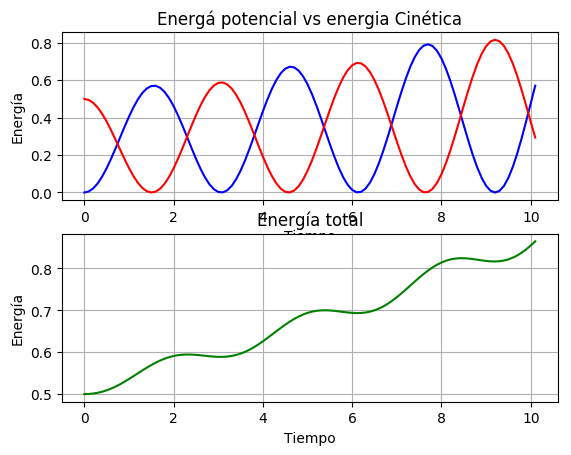

In [40]:
energiaoscilador2((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,1.0,0.1,1,1)

## Dicusión
Se grafica de la energía total con ambos métodos, la gráfica de la energía total debe ser la de una función una constante, sin embargo, en ambos métodos ésta es creciente, conforme pasa el tiempo. Pero en el método de Runge Kutta este crecimiento es menor que en el de Euler. 

## Ejercicio 7
Utilizando los métodos de Euler y Runge-Kutta con $h=0.01$ y una condición inicial, grafique las dos trayectorias en el espacio $(x,v)$ (esto casi es el espacio de fase en la mécanica clásica, para ello se necesitaria graficar $(x,p)$. Nota: Si ya tiene una forma de calcular $x$ y $v$ en forma de listas, digamos listx y listv, bastará con hacer plot(listx,listv).

## Solución
se crea una función para cada método, que obtiene la gráfica del espacio fase.  

In [41]:
function espaciofaseoscilador1(g::Function,g1::Function,t0,tf,y10,y20,delta,m)
    t = []
    y1 = []
    y2 = [] 
    k11(t,u1,u2) = g(t,u1,u2)*delta
    k21(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k31(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k41(t,u1,u2) = g(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    k12(t,u1,u2)= g1(t,u1,u2)*delta
    k22(t,u1,u2)= g1(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k32(t,u1,u2) = g1(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k42(t,u1,u2) = g1(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    f1(t,u1,u2) = u1+1/6*(k11(t,u1,u2)+2*k21(t,u1,u2)+2*k31(t,u1,u2)+k41(t,u1,u2))
    f2(t,u1,u2) = u2+1/6*(k12(t,u1,u2)+2*k22(t,u1,u2)+2*k32(t,u1,u2)+k42(t,u1,u2))
    push!(t,t0)
    push!(y1,y10)
    push!(y2,y20)
    while(t[length(t)]<tf)
        push!(t, t[length(t)]+delta)
        push!(y1,f1(t[length(t)-1],y1[length(y1)],y2[length(y2)]))
        push!(y2,f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)])) 
    end
    figure()
    plot(y2, m*y1, color = "violet")
    legend()
    title("Espacio Fase")
   ylabel(L"\vec{p}")
    xlabel(L"\vec{x}")
    grid()
   
end

espaciofaseoscilador1 (generic function with 1 method)

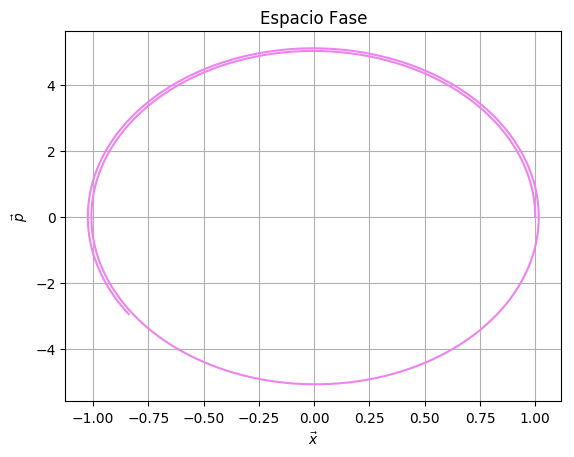

In [42]:
espaciofaseoscilador1((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,1.0,0.01,5)

In [43]:
function espaciofaseoscilador2(f::Function,f2::Function,time0,timef,y10,y20,delta,m)
   y2=[]
    y1=[]
    t=[]
   
    push!(t,time0)
    push!(y1,y10)
     push!(y2,y20)
    
    while(t[length(t)]<timef)
        push!(t,t[length(t)]+delta)
        push!(y1,y1[length(y1)]+f(t[length(t)-1],y1[length(y1)],y2[length(y2)])*delta)
        push!(y2,y2[length(y2)]+f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)])*delta)
     
    end
    
    
    plot(y2, y1, color = "purple")
   
    legend()
    title("Espacio Fase")
    ylabel(L"\vec{p}")
    xlabel(L"\vec{x}")
   grid()
    
end

espaciofaseoscilador2 (generic function with 1 method)

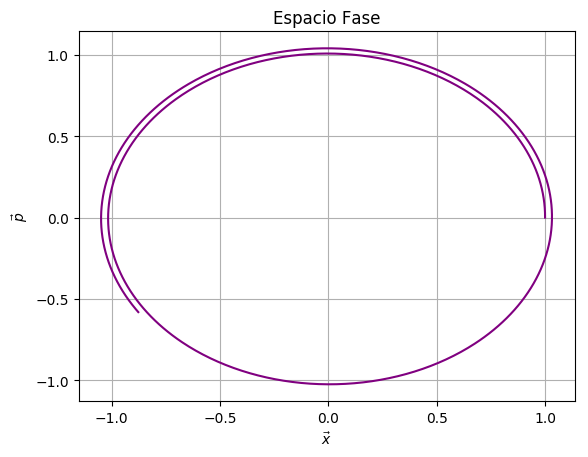

In [44]:
espaciofaseoscilador2((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,1.0,0.01,5)

## Ejercicio 8
Utilizando solo Runge-Kutta, grafique muchas condiciones iniciales del oscilador armónico en el espacio de fase. Tome todos los parámetros como prefiera, revisando que obtiene el resultado esperado.

## Solución 
Se crean dos funciones, una que calcule los arreglos correspondientes a $\frac{df(x)}{dx}$ y $f(x)$, y la segundo gráfica el espacio fase $\vec{x}$ que corresponde a $f(x)$, y $\vec{p}$ a $m\frac{df(x)}{dx}$,

In [45]:
function espaciofaseoscilador3(g::Function,g1::Function,t0,tf,y10,y20,delta,m)
   t = []
    y1 = []
    y2 = [] 
    k11(t,u1,u2) = g(t,u1,u2)*delta
    k21(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k31(t,u1,u2)= g(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k41(t,u1,u2) = g(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    k12(t,u1,u2)= g1(t,u1,u2)*delta
    k22(t,u1,u2)= g1(t+delta/2,u1+(delta/2)*u2,u2+k11(t,u1,u2)/2)*delta
    k32(t,u1,u2) = g1(t+delta/2,u1+(delta/2)*u2+(delta/4)*k11(t,u1,u2),u2+(k21(t,u1,u2)/2))*delta
    k42(t,u1,u2) = g1(t+delta,u1+delta*u2+(delta/2)*k21(t,u1,u2),u2+k31(t,u1,u2))*delta
    f1(t,u1,u2) = u1+1/6*(k11(t,u1,u2)+2*k21(t,u1,u2)+2*k31(t,u1,u2)+k41(t,u1,u2))
    f2(t,u1,u2) = u2+1/6*(k12(t,u1,u2)+2*k22(t,u1,u2)+2*k32(t,u1,u2)+k42(t,u1,u2))
    push!(t,t0)
    push!(y1,y10)
    push!(y2,y20)
    while(t[length(t)]<tf)
        push!(t, t[length(t)]+delta)
        push!(y1,f1(t[length(t)-1],y1[length(y1)],y2[length(y2)]))
        push!(y2,f2(t[length(t)-1],y1[length(y1)-1],y2[length(y2)])) 
    end
    return y2, y1 
end

espaciofaseoscilador3 (generic function with 1 method)

In [46]:
function grafica(g::Function,g1::Function,t0,tf,y10,y20,delta,m)
         plot(espaciofaseoscilador3(g,g1,t0,tf,y10,y20,delta,m)[2],espaciofaseoscilador3(g,g1,t0,tf,y10,y20,delta,m)[1])
    legend()
    title("Espacio Fase")
    ylabel(L"\vec{p}")
    xlabel(L"\vec{x}")
   grid()
end

grafica (generic function with 1 method)

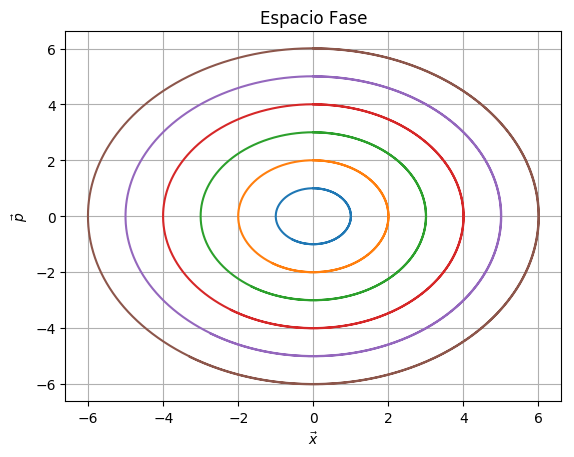

In [47]:
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,1.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,2.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,3.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,4.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,5.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,0.0,6.0,0.001,5)
 grid()

Se prueban varias condiciones inciales con una función random, para ver el cambio en el diagrama fase. 

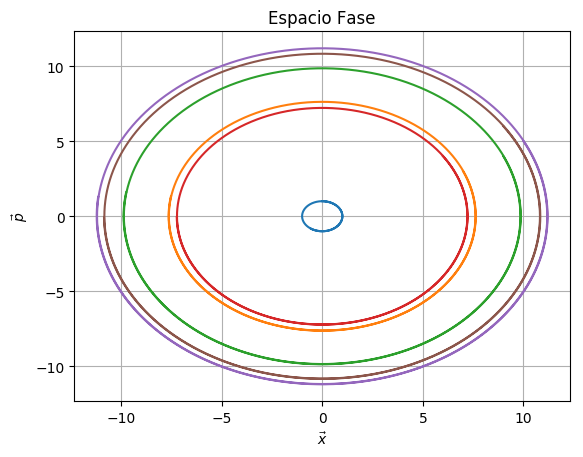

In [48]:
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,rand(0.0:10.0),1.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,rand(0.0:10.0),3.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,rand(0.0:10.0),4.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,rand(0.0:10.0),4.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,rand(0.0:10.0),5.0,0.001,5)
grafica((t,y1,y2)->y2,(t,y1,y2)->-y1,0.0,10.0,rand(0.0:10.0),6.0,0.001,5)
grid()